# A* Algorithm for Shortest Path Finding

# Author
Rizky Anggita S Siregar - 13519132 <br>
Wilson Tandya           - 13519228<br>
Institut Teknologi Bandung <br>
2021 <br>

In [1]:
# Run this cell for the first time
!pip3 install numpy
!pip3 install numpy
!pip3 install matplotlib
!pip3 install networkx
!pip3 install decorator==4.4.2
!pip3 install folium

You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import os
import math
import queue
from queue import PriorityQueue
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import folium
from folium import plugins

In [3]:
# Self-made Graph Class
# Graph implemented with list of nodes and adjacency weigted matrix
class Graph():
    def __init__(self, nNodes):
        self.nodes = []
        self.adj_matrix = []

        # Initialize Weighted Graph Adjacency Matrix
        for i in range(nNodes):
            col = []
            for j in range(nNodes):
                col.append(0)
            self.adj_matrix.append(col)

    def add_node(self, node):
        self.nodes.append(node)

    def add_edge(self, u, v, weight):
        index_u = self.nodes.index(u)
        index_v = self.nodes.index(v)
        self.adj_matrix[index_u][index_v] = weight
    
    def print_node(self):
        for node in self.nodes:
            print(node, end=" ")
        print()

    def print_graph(self):
        nNodes = len(self.nodes)
        print("  " *len(self.nodes[0]), end="" )
        self.print_node()
        for i in range (nNodes):
            for j in range (nNodes):
                #if(j==0):
                #    print(self.nodes[i], end=" ")
                print(self.adj_matrix[i][j], end=" \t")
            print()

In [4]:
# Several needed function
def add_graph_from_txt(g, nodeCoordinate, file):
    nodeCoordinate = []

    for i in range (nNodes):
        temp = file.readline()
        temp = temp.rsplit(" ")
        nodeCoordinate.append((float(temp[0]), float(temp[1])))
        g.add_node(temp[2].rstrip("\n"))

    for i in range (nNodes):
        j = 0
        temp = file.readline().rsplit(" ")
        
        for weight in temp:
            g.add_edge(g.nodes[i], g.nodes[j], float(temp[j].rstrip("\n")))
            j+= 1
    
    return nodeCoordinate

def rad (x):
    return x*math.pi / 180

def haversin (p1, p2):
    R = 6378137 #Radius Bumi dalam meter
    dLat = rad(p2[0] - p1[0])
    dLong = rad(p2[1] - p1[1])
    a = (math.sin (dLat / 2))**2 + math.cos (rad(p1[0])) * math.cos (rad(p2[0])) * (math.sin(dLong / 2))**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    res = R * c
    return res

def euclidean_dist(pointA, pointB):
    # Menghitung jarak dua buah titik
    xKuad = (pointA[0] - pointB[0])**2
    yKuad = (pointA[1] - pointB[1])**2
    return math.sqrt(xKuad + yKuad)

def SearchIdxNode(N, g):
    for i in range(len(g.nodes)):
        if (N == g.nodes[i]):
            return i

In [5]:
# A* Function
def AStarV2(g, From, To, nodeCoordinate):
    def construct_path(cameFrom, From, To, g):
        path = []
        idxFrom = g.nodes.index(From)
        idxTo = g.nodes.index(To)

        i = idxTo
        path.append(g.nodes[idxTo])
        while(i != idxFrom):
            print(i)
            path.append(cameFrom[i])
            i = g.nodes.index(cameFrom[i])
        
        path.reverse()
        return path

    def isInPrioQueue(prioQueue, node):
        for item in prioQueue.queue:
            if(item[1] == node):
                return True
        return False

    found = False
    openSet = queue.PriorityQueue()
    idxFrom = g.nodes.index(From)
    idxTo = g.nodes.index(To)

    f2 = 0 + haversin(nodeCoordinate[idxFrom], nodeCoordinate[idxTo])
    openSet.put((f2, From))

    # // For node n, gScore[n] is the cost of the cheapest path from start to n currently known.
    gScore = []

    # // For node n, fScore[n] := gScore[n] + h(n). fScore[n] represents our current best guess as to
    # // how short a path from start to finish can be if it goes through n.
    fScore = []
    cameFrom = []

    for node in g2.nodes:
        if (node==From):
            gScore.append(0)
            fScore.append(haversin(nodeCoordinate[idxFrom], nodeCoordinate[idxTo]))
        else:
            gScore.append(99999)
            fScore.append(99999)
        cameFrom.append("")

    while (not openSet.empty()):
        print(openSet.queue)
        current = openSet.get()
        currentIdx = g.nodes.index(current[1])
        if(current[1] == To):
            print("FOUND")
            found = True
            break
        print()
        # Foreach neighbour of current
        # neighbour is every node that connected with current node
        # with weight > 0
        for i in range(nNodes):
            if (g.adj_matrix[currentIdx][i] > 0):
                #  tentative_gScore is the distance from start to the neighbor through current
                # d jarak dari node current ke tetangganya (weigthnya)
                d = g.adj_matrix[currentIdx][i]
                tentative_gScore = gScore[currentIdx] + d
                
                # kalau kita mengunjungi node yang sama dua kali, kita cek apakah gScore node ini
                # lebih pendek jika dibandingkan dengan tentative_gscore, yaitu dikunjungi melalui node lain
            
                if (tentative_gScore < gScore[i]):
                    cameFrom[i] = current[1]
                    gScore[i] = tentative_gScore
                    titikNeighbour = nodeCoordinate[i]
                    hn = haversin(titikNeighbour, nodeCoordinate[idxTo])
                    fScore[i] = gScore[i] + hn

                    if not (isInPrioQueue(openSet, g.nodes[i])):
                        openSet.put((fScore[i], g.nodes[i]))
    return construct_path(cameFrom, From, To, g), gScore

In [6]:
# Function to visualize graph with networkx
def visualize_graph(g2, solusi):

    adj_np = np.array(g2.adj_matrix)
    namaNode = g2.nodes
    mylabels = {}
    for i in range (len(namaNode)):
        mylabels[i] = namaNode[i]
 
    G = nx.from_numpy_matrix(adj_np, create_using=nx.DiGraph)
    color_map = []
    edge_colors = []    
    solusi_idx = []

    for i in range (len(solusi)):
        a = g2.nodes.index(solusi[i])
        solusi_idx.append(a)
        
    for node in G.nodes:
        if node in solusi_idx:
            color_map.append("green")
        else:
            color_map.append("red")

    for edges in G.edges:
        if(edges[0] in solusi_idx and (edges[1] in solusi_idx) ):
            edge_colors.append("green")
        else:
            edge_colors.append("red")

    layout = nx.spring_layout(G)
    nx.draw(G, layout, node_size=1000, node_color = color_map, edge_color = edge_colors, labels=mylabels, with_labels=True, arrows=False)
    jarak = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=jarak)
    plt.show()

In [ ]:
import os
#-------MAIN PROGRAM-----
filename = input(str("Masukkan nama file: "))
filename = filename+".txt"
a = os.path.abspath(os.curdir)


if os.name=='nt':
    file_path = os.path.join(filename)
else:
    file_path = os.path.join(a, filename)

print(file_path)
f = open(file_path, "r")

nNodes = int(f.readline())
nodeCoordinate = []
g2 = Graph(nNodes)
nodeCoordinate = add_graph_from_txt(g2, nodeCoordinate, f)

g2.print_graph()
From = input(str("Asal:"))
To = input(str("Tujuan:"))
#solusi = AStar(g2, From, To)
solusi2, gScore = AStarV2(g2, From, To, nodeCoordinate)


#print("Solusi A* V1: ", solusi)

print("Solusi A* V2: ", solusi2)
print("Jarak tempuh: ", gScore[g2.nodes.index(To)])

#Koordinat lokasi dari file eksternal
coordinates = []  
for i in (nodeCoordinate):
    coordinates.append(i)

name = []
for i in (g2.nodes):
    name.append(i)

latitude = []
longitude = []
for i in range(len(coordinates)):
    latitude.append(coordinates[i][0])
    longitude.append(coordinates[i][1])

#Koordinat jalur shortest path
mapHasil = []
for i in range (len(solusi2)):
    mapHasil.append(nodeCoordinate[SearchIdxNode(solusi2[i], g2)])
      

visualisasiMap = folium.Map(location=coordinates[0], zoom_start=16)
for index,lat in enumerate(latitude):
    folium.Marker([lat,
    longitude[index]],
    popup=('{} \n'.format(name[index])),
    icon = folium.Icon(color='blue'), tooltip=name[index]).add_to(visualisasiMap)
    #Buat Ant Path dari jalur yang ditempuh
    #plugins.AntPath(locations=mapHasil,weight=5, color = "green").add_to(visualisasiMap)

Masukkan nama file: ITB
ITB.txt
                                GerbangITBGanesa SimpanganTamansariGanesa SimpanganGanesaJuanda BonBin TikunganTamfest SimpanganEmpatMcD McDDago PertigaanTamansariDayangSumbi SimpanganDayangSumbiJuanda SimpanganSiliwangiSaraga SaragaITB PertigaanTamansariSiliwangi PertigaanSiliwangiSumur PertigaanSiliwangiSangkuriang LIPICisitu 
0.0 	240.0 	280.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	
240.0 	0.0 	0.0 	400.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	
280.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	700.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	
0.0 	400.0 	0.0 	0.0 	290.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	
0.0 	0.0 	0.0 	290.0 	0.0 	0.0 	0.0 	350.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	
0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	27.0 	0.0 	250.0 	0.0 	0.0 	0.0 	76.0 	0.0 	0.0 	
0.0 	0.0 	0.0 	0.0 	0.0 	27.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	0.0 	
0.0 	0.0 	0.0 	0.0 	350.0 	0.0 	0.0 	0.0 	270.0 	0.0 	0.0 	270.0 	290.0 	0.0 	0.

C:\Users\wilso\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\wilso\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


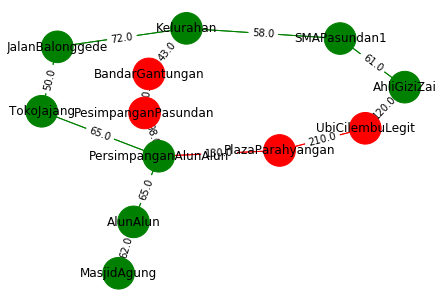

In [8]:
# Visualizing the graph with weighted edges as distance between two nodees
visualize_graph(g2, solusi2)

In [15]:
# Visualize map and its shortest route with Folium
visualisasiMap